# Ultimate Challenge

## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### Load the data

In [2]:
# Load json file as a dataframe
login_data = pd.read_json('./logins.json')

# Add a column to represent the number of logins during each time
login_data['login_count'] = 1

# Convert the date to a datetime object, and set it as the index
login_data['login_time'] = pd.to_datetime(login_data['login_time'], unit='s')
login_data.set_index('login_time', inplace=True)

login_data.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


### Process time-series data into 15 min chunks

In [3]:
# resample the index, so that time is represented in 15min chunks
logins_data_15min = login_data.resample('15Min').sum()

In [4]:
logins_data_15min.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Visualization

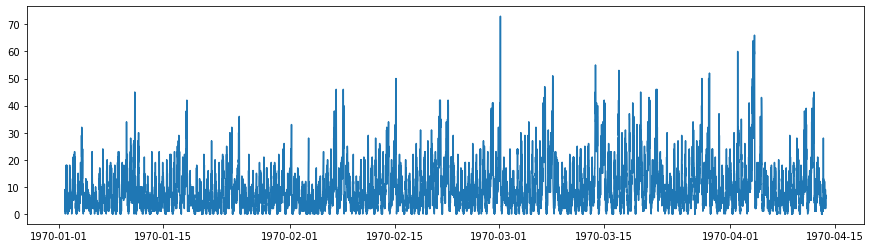

In [5]:
plt.figure(figsize=(15, 4))
plt.plot(logins_data_15min.login_count)
plt.show()

### Resample the data to different time window 

* Look at the entire time-series with larger chunksize
* Look at specific days separately
* Find the busiest time of day

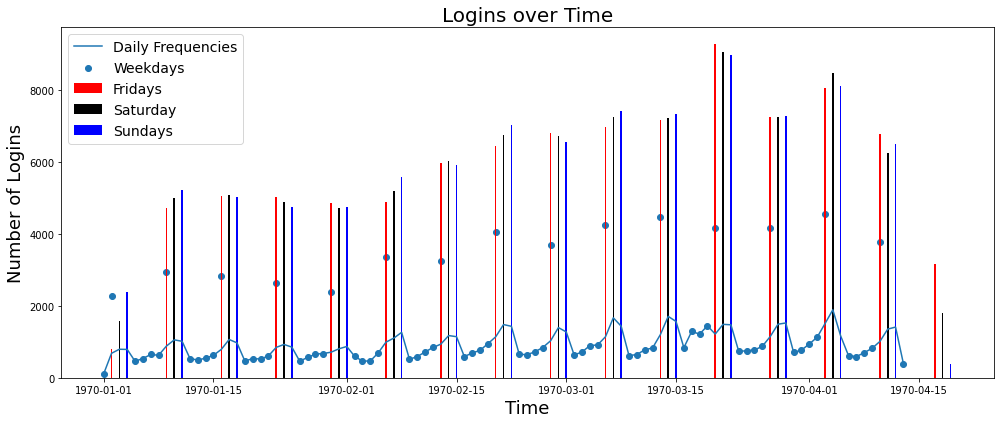

In [6]:
# bin data by the day
logins_data_daily = login_data.resample('D').sum()
logins_data_biz_day = login_data.resample('B').sum()
fridays = login_data.resample('W-FRI').sum()
saturdays = login_data.resample('W-SAT').sum()
sundays = login_data.resample('W-SUN').sum()


# line, scatterplot, and histograms of the binned data
fig, ax = plt.subplots(figsize = (14, 6))
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Number of Logins', fontsize = 18)
plt.title('Logins over Time', fontsize = 20)

plt.bar(fridays.index, fridays.login_count, align= 'center', width = 0.2, label = "Fridays", color = 'red')
plt.bar(saturdays.index, saturdays.login_count, label = 'Saturday', align = 'center', width = 0.2, color = 'black')
plt.bar(sundays.index, sundays.login_count, label = "Sundays", align= 'center', width = 0.2, color = 'blue')
plt.plot(logins_data_daily.index, logins_data_daily.login_count, label = 'Daily Frequencies')
plt.scatter(logins_data_biz_day.index, logins_data_biz_day.login_count, label='Weekdays')

plt.legend(loc='upper left', fontsize = 14)
plt.tight_layout()

From the plot, we can see that more longins happen on Fridays and weekends.

### Find hourly trends by day of week


In [7]:
# resample index hourly
logins_data_hourly = login_data.resample('H').sum()
# make a column that identify the day of week; Monday=0, Sunday=6
day_of_week = list(logins_data_hourly.index.dayofweek)
logins_data_hourly['day_of_week'] = day_of_week
# add column with just the hour (omiting the date)
logins_data_hourly['hour'] = [time.hour for time in logins_data_hourly.index]
logins_data_hourly.head()

,login_count,day_of_week,hour
login_time,,,
1970-01-01 20:00:00,24,3,20
1970-01-01 21:00:00,9,3,21
1970-01-01 22:00:00,21,3,22
1970-01-01 23:00:00,58,3,23
1970-01-02 00:00:00,53,4,0


In [17]:
# create dataframe of the average number of logins for each hour of each day
avg_hourly_logins = pd.pivot_table(logins_data_hourly, values = 'login_count', index = 'hour', columns = 'day_of_week', aggfunc=np.mean).rename(columns= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
# stack
avg_hourly_logins = avg_hourly_logins.stack(level=['day_of_week'])
# name the stack
avg_hourly_logins.name = 'avg_num_logins'
avg_hourly_logins_df = avg_hourly_logins.reset_index()
avg_hourly_logins_df.head()

,hour,day_of_week,avg_num_logins
0,0,Monday,35.400000
1,0,Tuesday,43.357143
2,0,Wednesday,49.071429
3,0,Thursday,58.285714
4,0,Friday,65.000000


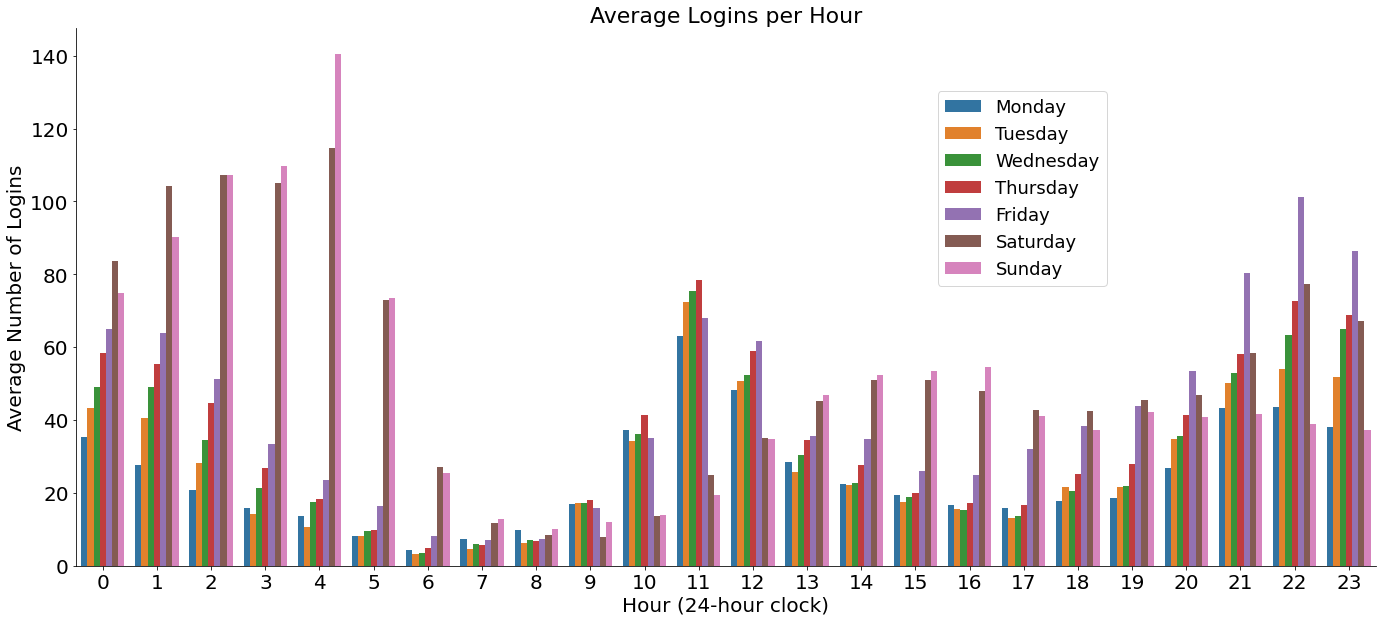

In [35]:
# plot average hourly use
sns.catplot(x='hour', y='avg_num_logins', data=avg_hourly_logins_df, kind = 'bar', 
            hue='day_of_week',height=8, aspect=11.7/5, legend=False)
ax = plt.gca()
ax.set_title('Average Logins per Hour', fontsize = 22)
ax.set_xlabel('Hour (24-hour clock)', fontsize = 20)
ax.set_ylabel('Average Number of Logins', fontsize = 20)
ax.tick_params(labelsize=20,labelcolor="black")
ax.legend(bbox_to_anchor=(0.7,0.7,0.1, 0.2),fontsize=18)

In [54]:
# Split the data into subset for different week day

monday_df = avg_hourly_logins_df[avg_hourly_logins_df['day_of_week'] == 'Monday']
tuesday_df = avg_hourly_logins_df[avg_hourly_logins_df['day_of_week'] == 'Tuesday']
wednesday_df = avg_hourly_logins_df[avg_hourly_logins_df['day_of_week'] == 'Wednesday']
thursday_df = avg_hourly_logins_df[avg_hourly_logins_df['day_of_week'] == 'Thursday']
friday_df = avg_hourly_logins_df[avg_hourly_logins_df['day_of_week'] == 'Friday']
saturday_df = avg_hourly_logins_df[avg_hourly_logins_df['day_of_week'] == 'Saturday']
sunday_df = avg_hourly_logins_df[avg_hourly_logins_df['day_of_week'] == 'Sunday']

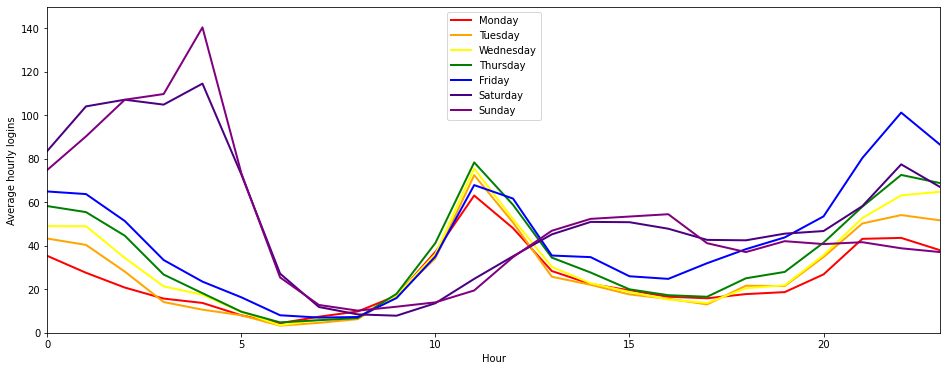

In [55]:
plt.figure(figsize=(16, 6))
plt.plot(monday_df['hour'], monday_df['avg_num_logins'], color='red', linewidth=2.0, label='Monday')
plt.plot(tuesday_df['hour'], tuesday_df['avg_num_logins'], color='orange', linewidth=2.0, label='Tuesday')
plt.plot(wednesday_df['hour'], wednesday_df['avg_num_logins'], color='yellow', linewidth=2.0, label='Wednesday')
plt.plot(thursday_df['hour'], thursday_df['avg_num_logins'], color='green', linewidth=2.0, label='Thursday')
plt.plot(friday_df['hour'], friday_df['avg_num_logins'], color='blue', linewidth=2.0, label='Friday')
plt.plot(saturday_df['hour'], saturday_df['avg_num_logins'], color='indigo', linewidth=2.0, label='Saturday')
plt.plot(sunday_df['hour'], sunday_df['avg_num_logins'], color='purple', linewidth=2.0, label='Sunday')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Average hourly logins')
plt.xlim(0, 23)
plt.ylim(0, 150)
plt.grid(which='minor', alpha=1)
plt.show()

From the above plot, we can see that weekdays and weekends have very different login patterns.

From Mondays to Fridays, the peak values happen around hour of 11 and 22. However, the peak values of Saturdays and Sundays happen around hour of 4 and 15. Saturdays have one more peak around 22. 